In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Look at first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape


(7043, 21)

In [3]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'].value_counts().head(10)


,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
19.55,7
45.3,7
20.15,6


In [6]:
# Convert TotalCharges to numeric (turn text into numbers)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


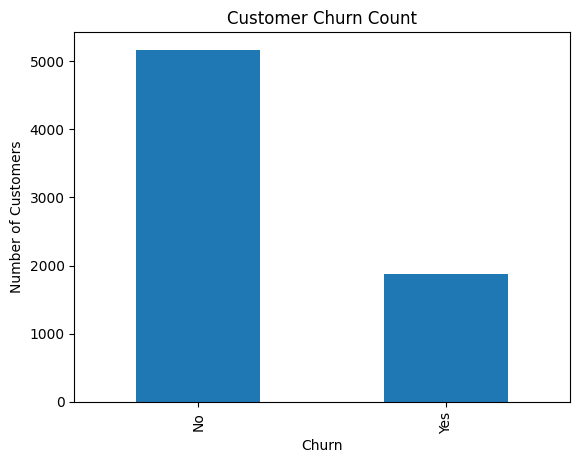

In [11]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


In [12]:
churn_percent = df['Churn'].value_counts(normalize=True) * 100
churn_percent


,proportion
Churn,
No,73.463013
Yes,26.536987


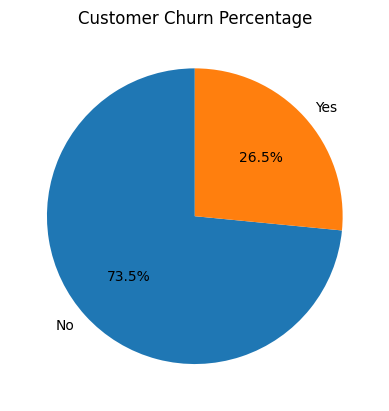

In [13]:
churn_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Percentage')
plt.ylabel('')
plt.show()


In [14]:
pd.crosstab(df['gender'], df['Churn'])


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


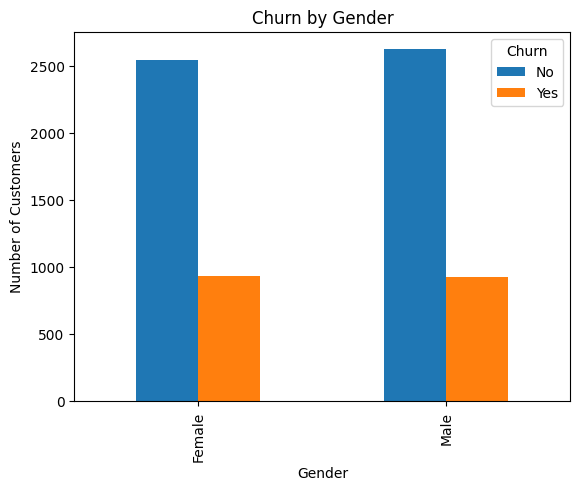

In [15]:
pd.crosstab(df['gender'], df['Churn']).plot(kind='bar')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


In [16]:
pd.crosstab(df['SeniorCitizen'], df['Churn'])


Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


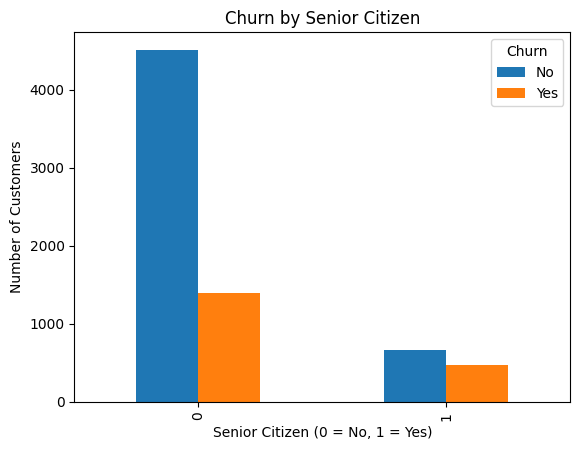

In [17]:
pd.crosstab(df['SeniorCitizen'], df['Churn']).plot(kind='bar')
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


In [18]:
pd.crosstab(df['Contract'], df['Churn'])


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


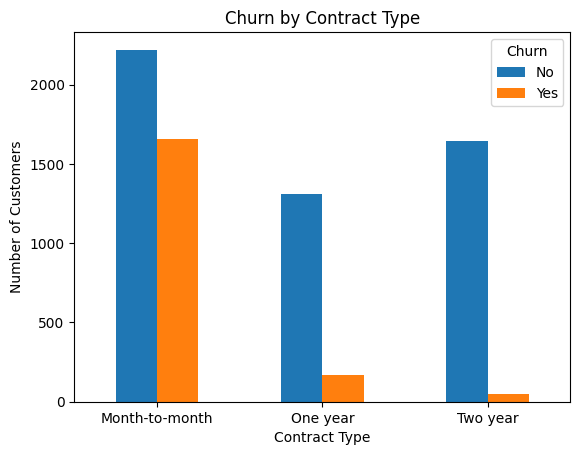

In [19]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


In [20]:
df.groupby('Churn')['tenure'].mean()


,tenure
Churn,
No,37.569965
Yes,17.979133


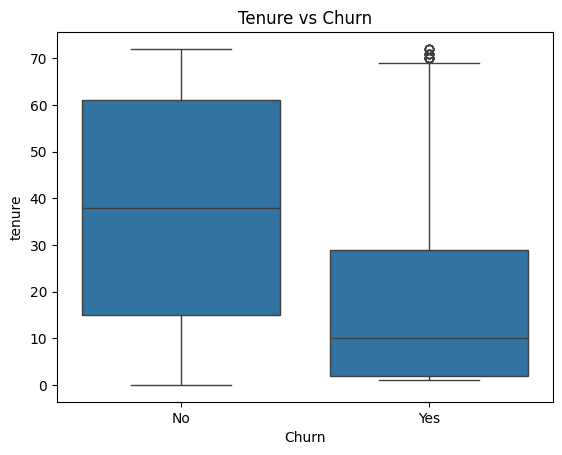

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


In [22]:
df.groupby('Churn')['MonthlyCharges'].mean()


,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


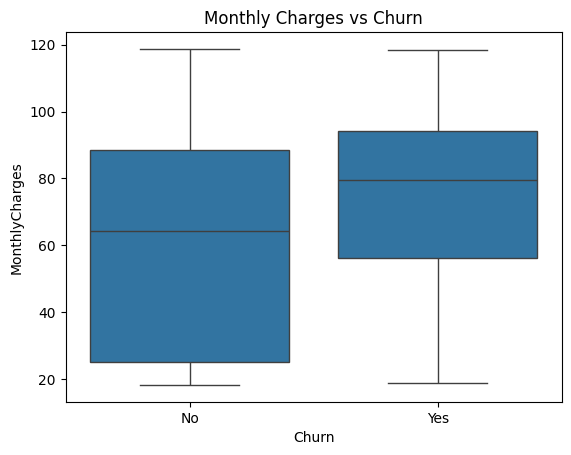

In [23]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


In [24]:
pd.crosstab(df['PaymentMethod'], df['Churn'])


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


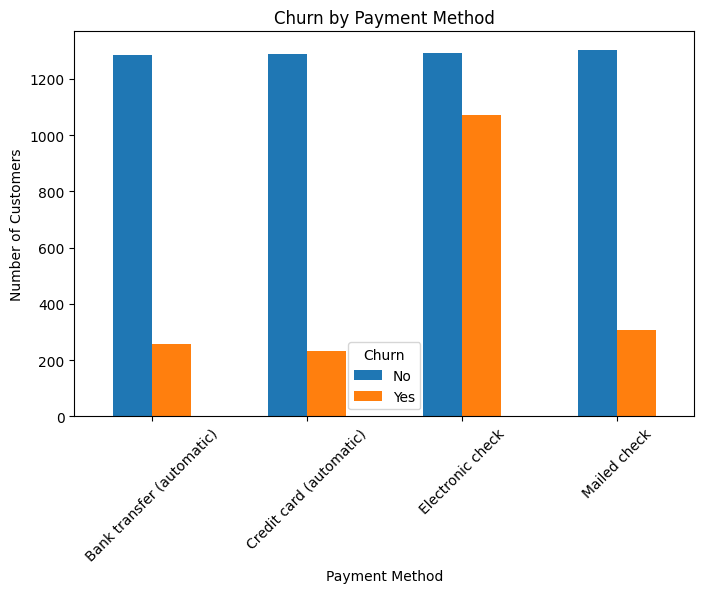

In [25]:
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar', figsize=(8,5))
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [26]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].head()


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [27]:
corr = df[numeric_features].corr()
corr


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


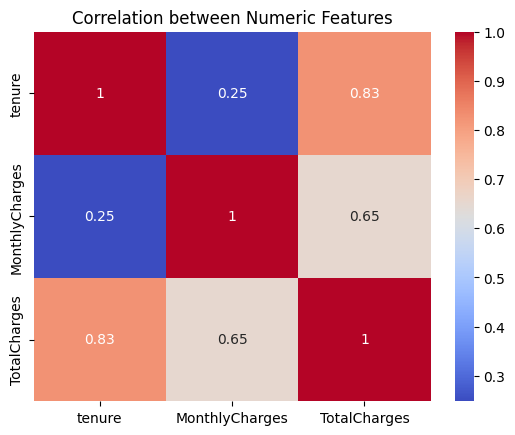

In [28]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


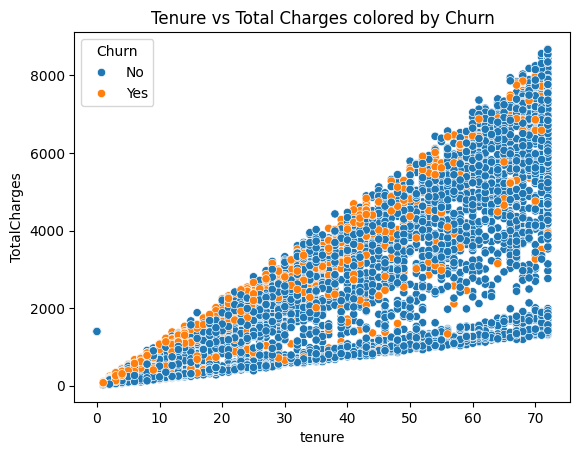

In [29]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs Total Charges colored by Churn')
plt.show()


In [30]:
# Convert 'Yes' = 1, 'No' = 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [31]:
# Drop customerID (not useful for prediction)
df_model = df.drop('customerID', axis=1)

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, drop_first=True)


In [32]:
# Features
X = df_model.drop('Churn', axis=1)

# Target
y = df_model['Churn']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
# Predict on test set
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8211497515968772
Confusion Matrix:
 [[933 103]
 [149 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [37]:
import pandas as pd
import numpy as np

# Feature names
features = X_train.columns

# Coefficients
coef = model.coef_[0]

# Combine into a DataFrame
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coef})

# Sort by absolute impact
feature_importance['abs_coef'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

feature_importance.head(10)


,Feature,Coefficient,abs_coef
25,Contract_Two year,-1.399850,1.399850
10,InternetService_Fiber optic,0.640171,0.640171
24,Contract_One year,-0.631767,0.631767
13,OnlineSecurity_Yes,-0.471879,0.471879
7,PhoneService_Yes,-0.447569,0.447569
19,TechSupport_Yes,-0.391451,0.391451
26,PaperlessBilling_Yes,0.339982,0.339982
28,PaymentMethod_Electronic check,0.325780,0.325780
8,MultipleLines_No phone service,0.266645,0.266645
23,StreamingMovies_Yes,0.226834,0.226834


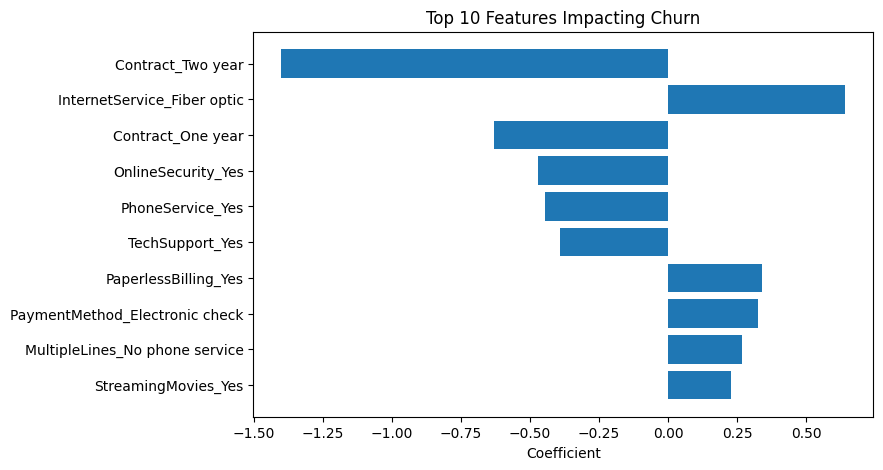

In [38]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)
plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Top 10 Features Impacting Churn')
plt.gca().invert_yaxis()
plt.show()


In [40]:
import os

# Create 'model' folder if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')


In [41]:
import joblib

# Save model inside the 'model' folder
joblib.dump(model, 'model/churn_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [42]:
from google.colab import files


In [43]:
files.download('model/churn_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>